# Data Exploratory 

In [13]:
!pip install wquantiles

  Using cached wquantiles-0.6-py3-none-any.whl.metadata (1.1 kB)
Using cached wquantiles-0.6-py3-none-any.whl (3.3 kB)


In [12]:
# cleanup
!pip uninstall wquantiles -y

Found existing installation: wquantiles 0.6
Uninstalling wquantiles-0.6:
  Successfully uninstalled wquantiles-0.6


In [61]:
%matplotlib inline

import numpy as np
import pandas as pd

import scipy
from scipy import stats

import statsmodels
import statsmodels.api as sm

import matplotlib
import matplotlib.pylab as plt

import seaborn as sns

import wquantiles

print(f"""
numpy: {np.__version__}
pandas: {pd.__version__}
scipy: {scipy.__version__}
statsmodels: {statsmodels.__version__}
matplotlib: {matplotlib.__version__}
seaborn: {sns.__version__}

wquantiles: {wquantiles.__version__}
""")


numpy: 2.1.3
pandas: 2.2.3
scipy: 1.14.1
statsmodels: 0.14.4
matplotlib: 3.9.2
seaborn: 0.13.2

wquantiles: 0.4



# Location
* mean, weighted mean, trimed mean
* median, weighted median
* percentile
* outerlier

In [4]:
#  Practical Statistics for Data Scientists > 1. Exploratory Data Analysis > Estimates of Location
data = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/state.csv')
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [6]:
# mean, median
data['Population'].mean(), data['Population'].median()

(np.float64(6162876.3), np.float64(4436369.5))

In [8]:
# trimed mean
stats.trim_mean(data['Population'], 0.1)

np.float64(4783697.125)

In [9]:
# weighted mean
np.average(data['Murder.Rate'], weights=data['Population'])

np.float64(4.445833981123393)

In [11]:
# weighted median
wquantiles.median(data['Murder.Rate'], weights=data['Population'])

np.float64(4.4)

# Variability
* 偏差 deviation
* 标准偏差 standard deviation, std
* 方差 variance
* 均值绝对偏差 mean absolute deviation, 
* Median absolute deviation from the median, MAD
* IQR: Interquartile range

In [21]:
# 标准偏差
data['Population'].std()

np.float64(6848235.347401142)

In [22]:
# IQR
data['Population'].quantile(0.75) - data['Population'].quantile(0.25)

np.float64(4847308.0)

In [25]:
# MAD
sm.robust.scale.mad(data['Population'], center=np.median)

np.float64(3849876.1459979336)

# Data Distribution
* boxplot
* frequency table
* histogram
* density plot

In [27]:
# percentile
data['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

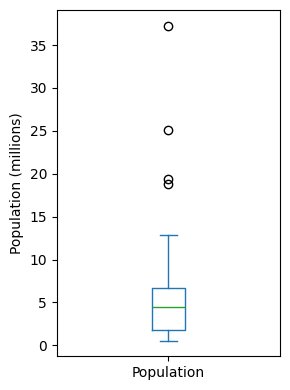

In [35]:
# boxplot
ax = (data['Population'] / 1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

In [39]:
# frequency table
bin_data = pd.cut(data['Population'], bins=10)
bin_data.head(), bin_data.value_counts()

(0      (4232659.0, 7901692.0]
 1      (526935.67, 4232659.0]
 2      (4232659.0, 7901692.0]
 3      (526935.67, 4232659.0]
 4    (33584923.0, 37253956.0]
 Name: Population, dtype: category
 Categories (10, interval[float64, right]): [(526935.67, 4232659.0] < (4232659.0, 7901692.0] < (7901692.0, 11570725.0] < (11570725.0, 15239758.0] ... (22577824.0, 26246857.0] < (26246857.0, 29915890.0] < (29915890.0, 33584923.0] < (33584923.0, 37253956.0]],
 Population
 (526935.67, 4232659.0]      24
 (4232659.0, 7901692.0]      14
 (7901692.0, 11570725.0]      6
 (11570725.0, 15239758.0]     2
 (15239758.0, 18908791.0]     1
 (18908791.0, 22577824.0]     1
 (22577824.0, 26246857.0]     1
 (33584923.0, 37253956.0]     1
 (26246857.0, 29915890.0]     0
 (29915890.0, 33584923.0]     0
 Name: count, dtype: int64)

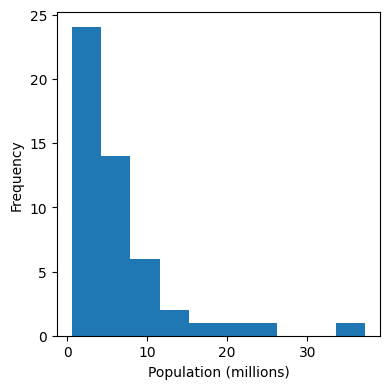

In [44]:
# histogram
ax = (data['Population'] / 1_000_000).plot.hist(bins=10, figsize=(4, 4))
ax.set_xlabel('Population (millions)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

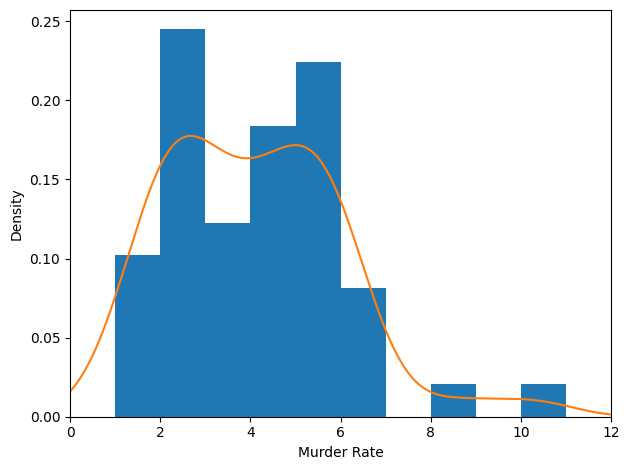

In [ ]:
# density
ax = data['Murder.Rate'].plot.hist(
    density=True, xlim=[0, 12], bins=range(1, 12))
data['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate')

plt.tight_layout()
plt.show()

# Categorical Data
* bar charts
* pie charts

In [50]:
data = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/dfw_airline.csv')
data

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


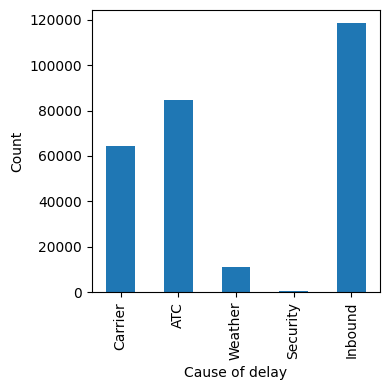

In [52]:
# bar chart
ax = data.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation
* 相关系数 correlation coefficient
* 散点图 scatterplot


In [53]:
sp500_sym = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/sp500_sectors.csv')
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [55]:
# 20.2 MB
sp500_px = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/sp500_data.csv.gz', index_col=0)
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [57]:
set(sp500_sym['sector'])

{'consumer_discretionary',
 'consumer_staples',
 'energy',
 'etf',
 'financials',
 'health_care',
 'industrials',
 'information_technology',
 'materials',
 'telecommunications_services',
 'utilities'}

In [58]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


In [60]:
# correlation coefficient
etfs.corr(method='pearson')

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.785865,0.888865,0.869680,0.056554,-0.468196,0.236881,0.782380,0.650054,0.798080,0.380809,0.784144,0.374000,0.663022,0.600424,0.787340,0.777773
QQQ,0.785865,1.000000,0.908995,0.834440,0.043553,-0.470555,0.199492,0.810158,0.560044,0.839701,0.346667,0.713463,0.421790,0.775392,0.614806,0.752771,0.945126
SPY,0.888865,0.908995,1.000000,0.953726,0.078722,-0.547074,0.272069,0.833937,0.713300,0.887028,0.481928,0.826053,0.406181,0.811269,0.744466,0.883616,0.886588
DIA,0.869680,0.834440,0.953726,1.000000,0.051523,-0.511327,0.256793,0.758012,0.658311,0.847043,0.463364,0.787415,0.383928,0.771044,0.753725,0.860556,0.842757
GLD,0.056554,0.043553,0.078722,0.051523,1.000000,-0.107488,0.216563,0.070110,0.188625,0.017467,0.121611,0.184366,-0.042233,-0.010200,0.033047,0.043039,0.053022
VXX,-0.468196,-0.470555,-0.547074,-0.511327,-0.107488,1.000000,-0.195397,-0.448942,-0.448474,-0.474756,-0.260395,-0.470890,-0.205661,-0.380925,-0.416913,-0.514365,-0.477258
USO,0.236881,0.199492,0.272069,0.256793,0.216563,-0.195397,1.000000,0.249799,0.525943,0.183275,0.113182,0.324166,0.078796,0.119500,0.116857,0.221760,0.225962
IWM,0.782380,0.810158,0.833937,0.758012,0.070110,-0.448942,0.249799,1.000000,0.586991,0.779750,0.325003,0.701533,0.387274,0.664288,0.537065,0.756282,0.760438
XLE,0.650054,0.560044,0.713300,0.658311,0.188625,-0.448474,0.525943,0.586991,1.000000,0.578956,0.337942,0.689778,0.260463,0.454457,0.413486,0.599129,0.559324
XLY,0.798080,0.839701,0.887028,0.847043,0.017467,-0.474756,0.183275,0.779750,0.578956,1.000000,0.366827,0.721232,0.370299,0.702860,0.663055,0.782053,0.772189


<Axes: >

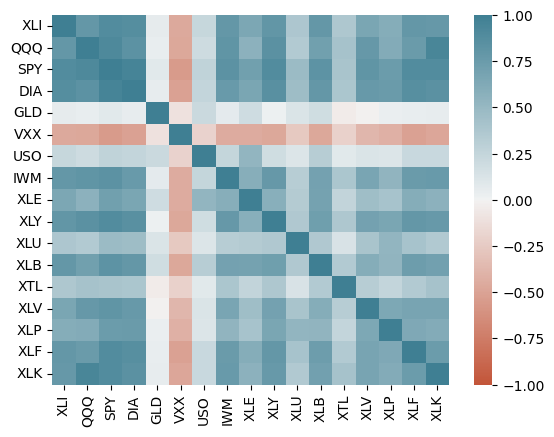

In [62]:
# heatmap
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

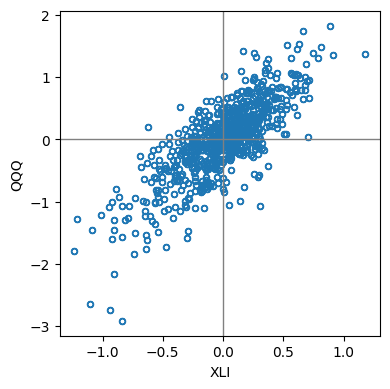

In [69]:
# scatterplot

ax = etfs.plot.scatter(x='XLI', y='QQQ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('XLI')
ax.set_ylabel('QQQ')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()


# Multivariate Analysis
* hexagonal binning plot
* contour plot

cases:
* numeric, numeric
* categorical, categorical
* categorical, numeric